## Building sample dashboards using plotly, dash and bootstrap

In [2]:
!pip install dash
!pip install dash-renderer
!pip install dash_html_components
!pip install dash_core_components

     |████████████████████████████████| 1.0 MB 7.3 MB/s eta 0:00:01
  Created wheel for dash-renderer: filename=dash_renderer-1.9.1-py3-none-any.whl size=1014873 sha256=9235a81251a6a122aba9bdd374eec1bb244635e344224afa329c68a61bb5860f
  Stored in directory: /Users/sneharav/Library/Caches/pip/wheels/52/2f/28/956ce9f7763c886d23f0082829bd726e5dacd6c708a5841c77
Successfully built dash-renderer


### Import Libraries

In [24]:
import dash
from dash import dcc
from dash import html

import numpy as np
import matplotlib.pyplot as plt


### Generate Synthetic Data

In [155]:
# Create Timestamps for every hour for 2 days

start_date = '2025-01-01'
end_date = '2025-01-31'

start_ts = pd.Timestamp(start_date)
end_ts = pd.Timestamp(end_date)
dti = pd.date_range(start=start_ts, end=end_ts, freq='H')


In [156]:
# Define a function that generates cyclical values with noise

def rand_cycle_data_generator(y_scale, y_shift, x_scale, noise_std, clip_min, clip_max, length, rounding_dp):
    
    # Define a cosine function
    y = round(y_shift + y_scale*(np.cos(df['Time of Day'].dt.hour * (2*np.pi/x_scale))),rounding_dp)
    
    # Add noise
    noise = np.round(np.random.normal(0,noise_std, size=length),rounding_dp)
    
    # Clip values at a minimum and maximum
    final_y = np.clip(y+noise, clip_min, clip_max)
    
    return final_y

In [157]:
# Define a function that plots x vs y

def plot_x_vs_y(x,y):
    fig,ax = plt.subplots(1)
    plt.figure(figsize=(200, 200))
    ax.plot(x,y)

In [158]:
# Create the dataframe with 6 columns

def create_dataframe(department):
    # Add the timestamp column
    df = pd.DataFrame(data=dti, columns = ['time_of_day'])
    
    # create department column
    df['department'] = department
    
    # Generate patient wait times column
    wait_times = rand_cycle_data_generator(y_scale=-30, y_shift=30, x_scale = 24, noise_std=5, clip_min=0, clip_max=None, length=len(dti), rounding_dp = 1)
    df['wait_time'] = wait_times
    
    # Generate number of patients waiting column
    num_patients_waiting = rand_cycle_data_generator(y_scale=-10, y_shift=10, x_scale = 24, noise_std=2, clip_min=0, clip_max=None, length=len(dti), rounding_dp = 0)
    df['patients_waiting'] = num_patients_waiting.astype(int)
    
    # Generate number of doctors available column
    doctors_available = rand_cycle_data_generator(y_scale=2.5, y_shift=2.5, x_scale = 24, noise_std=1, clip_min=0, clip_max=5, length=len(dti), rounding_dp = 0)
    df['doctors_available'] = doctors_available.astype(int)
    
    # Generate Average Satisfaction Score column
    satisfaction_score = rand_cycle_data_generator(y_scale=2.5, y_shift=2.5, x_scale = 24, noise_std=1, clip_min=0, clip_max=5, length=len(dti), rounding_dp = 1)
    df['satisfaction_score'] = satisfaction_score
    
    return df

In [159]:
# Create 3 dummy departments

df_mood_disorders = create_dataframe(department='Mood Disorders')
df_memory_clinic = create_dataframe(department='Memory Clinic')
df_psychogeriatric_clinic = create_dataframe(department='Psychogeriatric Clinic')

ValueError: operands could not be broadcast together with shapes (49,) (721,) 

In [160]:
df_mood_disorders

,time_of_day,department,wait_time,patients_waiting,doctors_available,satisfaction_score
0,2024-01-01 00:00:00,Mood Disorders,0.2,3,5,5.0
1,2024-01-01 01:00:00,Mood Disorders,0.6,2,5,4.8
2,2024-01-01 02:00:00,Mood Disorders,6.4,0,5,5.0
3,2024-01-01 03:00:00,Mood Disorders,10.2,3,3,4.3
4,2024-01-01 04:00:00,Mood Disorders,11.9,3,5,5.0
5,2024-01-01 05:00:00,Mood Disorders,18.2,5,5,2.9
6,2024-01-01 06:00:00,Mood Disorders,24.6,15,4,2.0
7,2024-01-01 07:00:00,Mood Disorders,47.9,13,2,1.9
8,2024-01-01 08:00:00,Mood Disorders,46.2,17,2,1.4
9,2024-01-01 09:00:00,Mood Disorders,48.6,21,0,0.2


In [137]:
df_memory_clinic

,time_of_day,department,wait_time,patients_waiting,doctors_available,satisfaction_score
0,2024-01-01 00:00:00,Memory Clinic,0.0,5,5,4.5
1,2024-01-01 01:00:00,Memory Clinic,5.4,1,3,5.0
2,2024-01-01 02:00:00,Memory Clinic,7.2,2,4,5.0
3,2024-01-01 03:00:00,Memory Clinic,1.1,1,4,5.0
4,2024-01-01 04:00:00,Memory Clinic,13.9,11,5,4.8
5,2024-01-01 05:00:00,Memory Clinic,16.0,9,4,3.6
6,2024-01-01 06:00:00,Memory Clinic,30.2,15,3,2.8
7,2024-01-01 07:00:00,Memory Clinic,34.1,12,1,2.8
8,2024-01-01 08:00:00,Memory Clinic,45.8,15,0,2.7
9,2024-01-01 09:00:00,Memory Clinic,55.5,18,1,0.0


In [138]:
df_psychogeriatric_clinic

,time_of_day,department,wait_time,patients_waiting,doctors_available,satisfaction_score
0,2024-01-01 00:00:00,Psychogeriatric Clinic,0.0,0,5,4.3
1,2024-01-01 01:00:00,Psychogeriatric Clinic,0.0,0,4,5.0
2,2024-01-01 02:00:00,Psychogeriatric Clinic,2.1,2,5,5.0
3,2024-01-01 03:00:00,Psychogeriatric Clinic,13.3,1,5,2.8
4,2024-01-01 04:00:00,Psychogeriatric Clinic,11.7,1,4,2.6
5,2024-01-01 05:00:00,Psychogeriatric Clinic,23.0,5,4,3.2
6,2024-01-01 06:00:00,Psychogeriatric Clinic,26.0,12,2,1.0
7,2024-01-01 07:00:00,Psychogeriatric Clinic,36.6,12,1,1.6
8,2024-01-01 08:00:00,Psychogeriatric Clinic,56.7,14,0,0.0
9,2024-01-01 09:00:00,Psychogeriatric Clinic,50.8,18,2,0.4


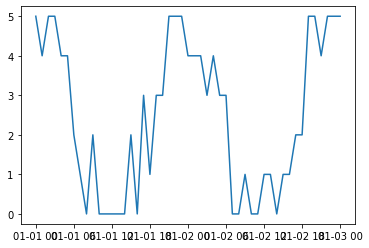

<Figure size 14400x14400 with 0 Axes>

In [140]:
plot_x_vs_y(x = df_psychogeriatric_clinic['time_of_day'], y = df_psychogeriatric_clinic['doctors_available'])

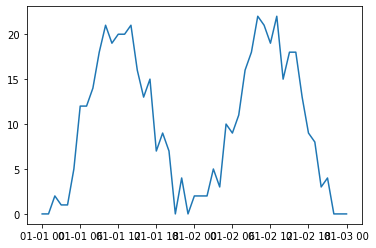

<Figure size 14400x14400 with 0 Axes>

In [141]:
plot_x_vs_y(x = df_memory_clinic['time_of_day'], y = df_psychogeriatric_clinic['patients_waiting'])

In [147]:
# Join the 3 dataframes to create one large dataframe

df_all= pd.concat([df_mood_disorders,df_memory_clinic,df_psychogeriatric_clinic])
df_all = df_all.sort_values(by=['time_of_day', 'department'])
df_all

,time_of_day,department,wait_time,patients_waiting,doctors_available,satisfaction_score
0,2024-01-01 00:00:00,Memory Clinic,0.0,5,5,4.5
0,2024-01-01 00:00:00,Mood Disorders,0.2,3,5,5.0
0,2024-01-01 00:00:00,Psychogeriatric Clinic,0.0,0,5,4.3
1,2024-01-01 01:00:00,Memory Clinic,5.4,1,3,5.0
1,2024-01-01 01:00:00,Mood Disorders,0.6,2,5,4.8
...,...,...,...,...,...,...
47,2024-01-02 23:00:00,Mood Disorders,6.0,0,5,2.5
47,2024-01-02 23:00:00,Psychogeriatric Clinic,2.3,0,5,5.0
48,2024-01-03 00:00:00,Memory Clinic,2.0,0,5,4.4
48,2024-01-03 00:00:00,Mood Disorders,3.3,1,4,5.0


In [ ]:
patient_data.to_csv("patient_data_python.csv", index=False)


### Data Preprocessing
Now that we have the synthetic data, let's do some data pre processing

In [162]:
synthetic_data = pd.read_csv("synthetic_data.csv")

In [163]:
synthetic_data.shape

(2163, 6)

In [164]:
synthetic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2163 entries, 0 to 2162
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time_of_day         2163 non-null   object 
 1   department          2163 non-null   object 
 2   wait_time           2163 non-null   float64
 3   patients_waiting    2163 non-null   int64  
 4   doctors_available   2163 non-null   int64  
 5   satisfaction_score  2163 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 101.5+ KB


In [165]:
synthetic_data.describe()

,wait_time,patients_waiting,doctors_available,satisfaction_score
count,2163.000000,2163.000000,2163.000000,2163.000000
mean,30.252381,10.127138,2.461859,2.512067
std,21.397984,7.415888,1.817990,1.746964
min,0.000000,0.000000,0.000000,0.000000
25%,9.450000,3.000000,1.000000,0.900000
50%,30.100000,10.000000,2.000000,2.500000
75%,50.300000,17.000000,4.000000,4.100000
max,75.800000,26.000000,5.000000,5.000000


In [166]:
# Checking for null values

synthetic_data.isnull().sum()

time_of_day           0
department            0
wait_time             0
patients_waiting      0
doctors_available     0
satisfaction_score    0
dtype: int64

In [168]:
# Checking for duplicates
synthetic_data.duplicated().sum()

0

In [169]:
synthetic_data.head()

,time_of_day,department,wait_time,patients_waiting,doctors_available,satisfaction_score
0,2025-01-01 00:00:00,Memory Clinic,7.3,0,3,4.3
1,2025-01-01 00:00:00,Mood Disorders,13.6,0,5,4.9
2,2025-01-01 00:00:00,Psychogeriatric Clinic,0.8,0,5,4.7
3,2025-01-01 01:00:00,Memory Clinic,11.1,1,5,5.0
4,2025-01-01 01:00:00,Mood Disorders,2.2,0,5,3.6


In [180]:
synthetic_data.to_dict('records')

[{'time_of_day': '2025-01-01 00:00:00',
  'department': 'Memory Clinic',
  'wait_time': 7.3,
  'patients_waiting': 0,
  'doctors_available': 3,
  'satisfaction_score': 4.3},
 {'time_of_day': '2025-01-01 00:00:00',
  'department': 'Mood Disorders',
  'wait_time': 13.6,
  'patients_waiting': 0,
  'doctors_available': 5,
  'satisfaction_score': 4.9},
 {'time_of_day': '2025-01-01 00:00:00',
  'department': 'Psychogeriatric Clinic',
  'wait_time': 0.8,
  'patients_waiting': 0,
  'doctors_available': 5,
  'satisfaction_score': 4.7},
 {'time_of_day': '2025-01-01 01:00:00',
  'department': 'Memory Clinic',
  'wait_time': 11.1,
  'patients_waiting': 1,
  'doctors_available': 5,
  'satisfaction_score': 5.0},
 {'time_of_day': '2025-01-01 01:00:00',
  'department': 'Mood Disorders',
  'wait_time': 2.2,
  'patients_waiting': 0,
  'doctors_available': 5,
  'satisfaction_score': 3.6},
 {'time_of_day': '2025-01-01 01:00:00',
  'department': 'Psychogeriatric Clinic',
  'wait_time': 3.5,
  'patients_wai

### Trying out Dash

Using this tutorial: https://dash.plotly.com/tutorial?utm_medium=graphing_libraries&utm_content=python_footer&_gl=1*3rlp60*_gcl_au*NjYyMzgyOTgxLjE3Mzg2NTg0Njc.*_ga*Mzg5NzA2NTAxLjE3Mzg2NTg0Njc.*_ga_6G7EE0JNSC*MTczODY1ODQ2Ny4xLjEuMTczODY1ODU5OC42MC4wLjA.


https://plotly.com/python/?_gl=1*iq9ph1*_gcl_au*NjYyMzgyOTgxLjE3Mzg2NTg0Njc.*_ga*Mzg5NzA2NTAxLjE3Mzg2NTg0Njc.*_ga_6G7EE0JNSC*MTczODY2MDY1OC4yLjEuMTczODY2MDg2Ni42MC4wLjA.

In [182]:
# Import packages
from dash import Dash, html, dash_table

# Initialize the app
app = Dash()

# App Layout
app.layout = [html.Div(children='Hospital Clinic Dashboard'),
              dash_table.DataTable(data=synthetic_data.to_dict('records'), page_size=20)]


# Run the app
if __name__ == '__main__':
    app.run(debug=True)